In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
#loading data
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

In [ ]:
testing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
#EDA
observations = len(training_data)
print(observations)


#adding log price and dropping sae pricefrom dataset
training_sale_price = training_data['SalePrice']
training_log_price = training_data['SalePrice'].apply(np.log)

#dealing with na values -- three cols have less than 300 observations in them
na_cols = training_data[training_data.columns[training_data.isnull().any()]]
na_cols.isna().sum()
training_data = training_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Id'], axis=1)

1460


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

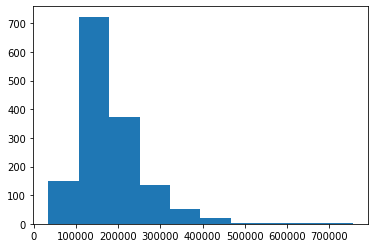

In [ ]:
print(na_cols.isna().sum())
training_data = training_data.dropna(axis = 0, subset = ["Electrical"])
plt.hist(training_sale_price)

In [ ]:
#training_data = training_data.drop(['SalePrice'], axis=1)

training_data.corr()["SalePrice"].sort_values(ascending = False)


SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
GarageYrBlt      0.486797
MasVnrArea       0.477486
Fireplaces       0.466968
BsmtFinSF1       0.386436
LotFrontage      0.351821
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64

In [ ]:
#dealing with basement
training_data[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']] = training_data[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']].fillna('None')

#dealign with garage
training_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = training_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')
training_data[['GarageYrBlt']] = training_data[['GarageYrBlt']].fillna(0)

#dealing with fence
training_data[['Fence']] = training_data[['Fence']].fillna('None')

#dealing with fireplace
training_data[['FireplaceQu']] = training_data[['FireplaceQu']].fillna('None')

training_data[['MasVnrArea']] = training_data[['MasVnrArea']].fillna(0)
training_data[['MasVnrType']] = training_data[['MasVnrType']].fillna('None')

training_data[['LotFrontage']] = training_data[['LotFrontage']].fillna(0)



In [ ]:
training_data = pd.get_dummies(training_data)

In [ ]:
training_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
training_categorical = training_data.select_dtypes(include=['object'])

categorical_cols = training_categorical.columns.values.tolist()

transformer = make_column_transformer(
    (OneHotEncoder(), categorical_cols ),
    remainder='passthrough')

transformed = transformer.fit_transform(training_data)
col_names = transformer.get_feature_names_out()

feature_arr = transformer.fit_transform(training_data).toarray()
feature_labels = transformer.get_feature_names_out()


transformed_training_data = pd.DataFrame(feature_arr, columns = feature_labels)

In [ ]:
transformed_training_data.corr()["remainder__GarageCars"].sort_values(ascending = False)


remainder__GarageCars               1.000000
remainder__GarageArea               0.882613
remainder__SalePrice                0.640473
remainder__OverallQual              0.600991
remainder__GarageYrBlt              0.597978
                                      ...   
onehotencoder__ExterQual_TA        -0.482109
onehotencoder__GarageType_None     -0.573266
onehotencoder__GarageQual_None     -0.573266
onehotencoder__GarageFinish_None   -0.573266
onehotencoder__GarageCond_None     -0.573266
Name: remainder__GarageCars, Length: 291, dtype: float64

290


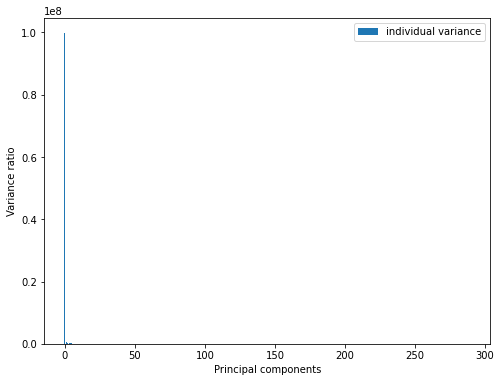

In [ ]:
y_train = transformed_training_data['remainder__SalePrice']
X_train = transformed_training_data.drop(columns=['remainder__SalePrice'])

lassoEst = LassoCV()
lassoEst.fit(X_train, y_train)
lassoEst.predict()


In [ ]:
for pair in coefs:
  if pair[0] != 0.0 or -0.0 :
    print(pair)

(0.28674065671438337, 'remainder__LotArea')
(311.2825881038584, 'remainder__YearBuilt')
(112.71882507538034, 'remainder__YearRemodAdd')
(37.316956306683615, 'remainder__MasVnrArea')
(12.200730765734919, 'remainder__BsmtFinSF1')
(33.44122416472798, 'remainder__TotalBsmtSF')
(2.0532422484037163, 'remainder__2ndFlrSF')
(64.25446034056903, 'remainder__GrLivArea')
(-0.5465802484348204, 'remainder__GarageYrBlt')
(68.87325561135495, 'remainder__GarageArea')
(29.371609585969818, 'remainder__WoodDeckSF')
(-0.13724008949553274, 'remainder__MiscVal')


In [ ]:
y_test = testing_data['SalePrice']
X_test = testing_data.drop(columns=['SalePrice'])


KeyError: ignored

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = transformed_training_data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(transformed_training_data.values, i)
                          for i in range(len(transformed_training_data.columns))]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif_data.head()

,feature,VIF
0,onehotencoder__MSZoning_C (all),inf
1,onehotencoder__MSZoning_FV,inf
2,onehotencoder__MSZoning_RH,inf
3,onehotencoder__MSZoning_RL,inf
4,onehotencoder__MSZoning_RM,inf
